# <데이터의 변환을 통해, 성능 향상을 시켜보자.>

# 1. 데이터의 변환을 전혀 하지 않고, 학습/예측을 하였을 때

## (1) 데이터 살펴보기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/workspace/ML_With_GPU/ML_Data/CreditCardFraud/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


V 속성은 무엇을 의미하는지 알 수가 없다. <br>
그리고 Time 속성은 큰 의미가 없기에 삭제하도록 한다. <br>
그리고 레이블의 경우 0:정상, 1:사기를 의미한다.

In [9]:
card_df.info()
card_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


전체 레코드 중 결측치 값은 없는 것을 확인할 수 있고, Class 레이블만 int형을 가지고 나머지는 모두 float 형을 가지는 것을 확인할 수 있다.

## (2) 데이터 전처리 함수 만들기

In [4]:
from sklearn.model_selection import train_test_split

#Time 칼럼을 삭제하는 함수, 이때 원래의 데이터는 건들지 않고 복사된 dataframe을 반환한다.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [5]:
#데이터 전처리 이후, 학습과 테스트 데이터 셋을 반환하는 함수(테스트 데이터는 전체의 30%로 할당)
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [15]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0])
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0])

학습 데이터 레이블 값 비율
0    0.998275
1    0.001725
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    0.998268
1    0.001732
Name: Class, dtype: float64


각각 사기를 의미하는 레이블 1의 비율이 0.1732%로 극도로 적다는 것을 알 수 있다.

## (3) 로지스틱 회귀 & LightGBM을 이용해 학습 및 예측 수행

get_clf_eval 함수 사용을 위한 정의

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #f1 스코어를 추가
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1스코어 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### - LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812, 재현율 : 0.6014, F1스코어 : 0.7149, AUC : 0.9564


### ➡️ 사이킷런의 Estimator 객체, 학습/테스트 데이터 셋을 인자로 입력 받아, 학습/예측/평가 를 모두 수행하는get_model_train_eval 함수를 새롭게 정의한다.

In [7]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

## - LightGBM

In [19]:
from lightgbm import LGBMClassifier
# boost_from_average의 경우, True로 할 경우, 평균값을 이용하는데, 이때 현 상황은 레이블의 비율이 굉장히 불균형한 상태이기 때문에, 평균을 이용하면,
#예측 성능이 매우 저조할 것이므로 False로 해서 사용해야 한다.(기본값은 True 이다.)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, F1스코어 : 0.8453, AUC : 0.9790


LightGBM의 예측 결과가 LogisticRegression보다는 높게 측정되었다.

# 2. "데이터 분포도 변환"을 수행하고, 학습/예측을 하였을 때

## (1) 피쳐값을 정규분포로 변환하는 함수 StandardScaler

대부분의 선형 모델은 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호하기 때문에, 각 데이터들을 정규분포 형태를 띄도록 만든 후 학습을 진행해본다.

💣Amount 피처는 신용카드 사용 금액으로 정상/사기 트랜잭션을 결정하는 매우 중요한 속성일 가능성이 높으므로 이 피처의 분포도를 살펴보자.

<AxesSubplot:xlabel='Amount', ylabel='Density'>

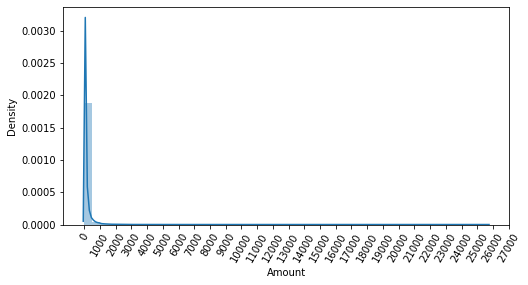

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

1000불 이하인 데이터가 대부분이고, 27000불까지 드물지만 많은 금액을 사용한 고객도 존재하여, 꼬리가 긴 분포 곡선을 지니는 것을 확인할 수 있다. <br>
해당 피쳐를 정규분포로 변환한 뒤에 예측 성능을 확인해보자.

In [27]:
from sklearn.preprocessing import StandardScaler
#위에서 정의한 get_preprocessed_df 함수 재정의
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #정규분포형태로 Amount피처값을 만든다.
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1 ,1))
    #정규분포형태를 가지는 amount_n을 다시 df_copy에 넣어준다.
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

## - LogisticRegression & LightGBM

In [31]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654, 재현율 : 0.6081, F1스코어 : 0.7143, AUC : 0.9702
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   37   111]]
정확도 : 0.9995, 정밀도 : 0.9569, 재현율 : 0.7500, F1스코어 : 0.8409, AUC : 0.9779


정규분포로 만든 뒤 학습을 하니, 미약하지만 성능 향상이 존재함을 확인할 수 있다.

## (2) 데이터 분포도의 왜곡을 줄여주는 numpy의 메소드 log1p()

In [32]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [33]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812, 재현율 : 0.6014, F1스코어 : 0.7149, AUC : 0.9727
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1스코어 : 0.8496, AUC : 0.9796


두 모델 모두 성능이 약간씩 개선됨을 확인할 수 있다.

# 3. "이상치 데이터 제거" 후, 학습/예측을 하였을 때

## (1) 이상치 제거를 위한 피쳐 선별

매우 많은 피쳐가 존재할 경우, 레이블값과 가장 연관성이 높은 피처들 위주로 이상치를 제거하는 것이 좋다.<br>
따라서 연관성이 높은지 여부를 히트맵으로 그려보고 연관성이 높은 피쳐를 찾아보자.

<AxesSubplot:>

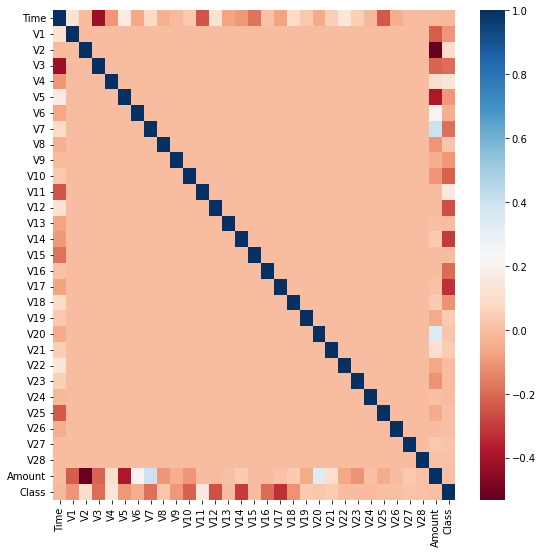

In [8]:
import seaborn as sns

plt.figure(figsize=(9, 9))
#corr() 함수는 각 피처별로 상관도를 구한다.
corr = card_df.corr()
#RdBu로 설정해, 양의 상관관계가 높을 수록 색이 진한 파란색에 가까우며, 음의 상관관계가 높을 수록 진한 빨간색에 가깝게 표시된다.
#양의 상관관계란 X와 Y가 있을 때, X가 높아지면 Y도 같이 높아지는 관계를 말한다. 음의 상관관계는 이 반대와 같다.
sns.heatmap(corr, cmap='RdBu')

이때 class와의 음의 상관관계가 제일 높은 피처는 V14, V17 이므로 이것으로 이상치를 제거하자.

## (2) 이상치 제거 - "넘파이의 percentile()"

In [23]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    #해당 피처에 해당하는 값을 가지는 데이터프레임
    f = df[column]
    #Q2, Q3을 계산
    quantile_25 = np.percentile(f.values, 25)
    quantile_75 = np.percentile(f.values, 75)
    #IQR을 계산하고, weight를 곱한 값을 이용해, 정상치의 최소값과 최대값을 설정
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25-iqr_weight
    highest_val = quantile_75+iqr_weight
    #이상치 데이터를 조건을 이용해 뽑아냄
    outlier_index = f[(f<lowest_val)|(f>highest_val)].index
    return outlier_index

In [24]:
outlier_index = get_outlier(card_df, 'V14')
print('이상치 데이터 인덱스 : ', outlier_index)
print(card_df['V14'].index)

이상치 데이터 인덱스 :  Int64Index([    82,    102,    104,    108,    146,    161,    181,    190,
               225,    245,
            ...
            284620, 284630, 284635, 284638, 284662, 284669, 284721, 284758,
            284782, 284802],
           dtype='int64', length=14149)
RangeIndex(start=0, stop=284807, step=1)


### 이상치를 찾고 이를 삭제하는 로직은 get_processed_df()함수에 추가한 뒤, 데이터를 재가공해 학습/예측을 진행하자.

In [25]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    #이상치 데이터 삭제 로직 추가
    outlier_index = get_outlier(df, 'V14', weight=1.5)
    df_copy.drop(index=outlier_index, axis=0, inplace=True)
    return df_copy

### - LogisticRegression, LightGBM

#### (1) 나의 테스트 : V14 데이터의 이상치 데이터 모두 제거시

In [26]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[81177     2]
 [   18     1]]
정확도 : 0.9998, 정밀도 : 0.3333, 재현율 : 0.0526, F1스코어 : 0.0909, AUC : 0.8450
### LightGBM 예측 성능 ###
오차행렬
[[81179     0]
 [   18     1]]
정확도 : 0.9998, 정밀도 : 1.0000, 재현율 : 0.0526, F1스코어 : 0.1000, AUC : 0.8483


#### (2) 나의 테스트 : V14 데이터 중 사기인 데이터(Class=1) 중 이상치 데이터 모두 제거시

In [27]:
def get_outlier(df=None, column=None, weight=1.5):
    #해당 피처에 해당하는 값을 가지는 데이터프레임
    f = df[df['Class']==1][column]
    #Q2, Q3을 계산
    quantile_25 = np.percentile(f.values, 25)
    quantile_75 = np.percentile(f.values, 75)
    #IQR을 계산하고, weight를 곱한 값을 이용해, 정상치의 최소값과 최대값을 설정
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25-iqr_weight
    highest_val = quantile_75+iqr_weight
    #이상치 데이터를 조건을 이용해 뽑아냄
    outlier_index = f[(f<lowest_val)|(f>highest_val)].index
    return outlier_index

In [28]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8750, 재현율 : 0.6712, F1스코어 : 0.7597, AUC : 0.9743
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   25   121]]
정확도 : 0.9996, 정밀도 : 0.9603, 재현율 : 0.8288, F1스코어 : 0.8897, AUC : 0.9780


#### (3) 나의 테스트 : V14 데이터 중 정상인 데이터(Class=0) 중 이상치 데이터 모두 제거시

In [29]:
def get_outlier(df=None, column=None, weight=1.5):
    #해당 피처에 해당하는 값을 가지는 데이터프레임
    f = df[df['Class']==0][column]
    #Q2, Q3을 계산
    quantile_25 = np.percentile(f.values, 25)
    quantile_75 = np.percentile(f.values, 75)
    #IQR을 계산하고, weight를 곱한 값을 이용해, 정상치의 최소값과 최대값을 설정
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25-iqr_weight
    highest_val = quantile_75+iqr_weight
    #이상치 데이터를 조건을 이용해 뽑아냄
    outlier_index = f[(f<lowest_val)|(f>highest_val)].index
    return outlier_index

In [30]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[81154     1]
 [   20   128]]
정확도 : 0.9997, 정밀도 : 0.9922, 재현율 : 0.8649, F1스코어 : 0.9242, AUC : 0.9839
### LightGBM 예측 성능 ###
오차행렬
[[81155     0]
 [   20   128]]
정확도 : 0.9998, 정밀도 : 1.0000, 재현율 : 0.8649, F1스코어 : 0.9275, AUC : 0.9908


## 테스트 결과!

피쳐가 V14인 데이터 중 정상인 데이터에서 이상치를 제거한 후 학습을 시켰을 때, 성능이 놀랍도록 증가하였다!

책에서는 사기인 데이터 중 이상치를 제거한 뒤 학습을 시켰지만, 책이 항상 옳은 것만은 아니니까..

# 4. "SMOTE 오버샘플링" 적용 후, 학습/예측을 하였을 때

## SMOTE 객체 이용

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
#fit_sample 메소드를 이용해 적은 클래스의 데이터 증식시키기
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피쳐/레이블 데이터 셋 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피쳐/레이블 데이터 셋 : ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피쳐/레이블 데이터 셋 :  (189704, 29) (189704,)
SMOTE 적용 후 학습용 피쳐/레이블 데이터 셋 :  (378720, 29) (378720,)
SMOTE 적용 후 레이블 값 분포 : 
 0    189360
1    189360
Name: Class, dtype: int64


매우 적었던 레이블 1의 데이터가 증식하여, 레이블 0, 1의 데이터의 개수가 동일해진 것을 확인할 수 있다.

## -LogisticRegression

In [36]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차행렬
[[79160  1995]
 [    7   141]]
정확도 : 0.9754, 정밀도 : 0.0660, 재현율 : 0.9527, F1스코어 : 0.1235, AUC : 0.9766


SMOTE로 데이터 재생성 뒤 학습한 결과, 재현율은 0.9527로 매우 높아졌으나, 정밀도가 0.0660으로 매우 낮아진 것을 확인할 수 있다. 이렇게 저조한 정밀도로는 현실업무에 적용이 불가능하다. 이렇게 된 이유를 추측해보자면, 오버샘플링을 통해 실제 원본 데이터의 유형보다 너무 많은 Class=1을 학습하면서, 테스트 데이터 셋에서 지나치게 Class=1 로 예측해 정밀도가 떨어진 것으로 보인다.<br>
따라서 분류결정 임계값에 따른 재현율/정밀도 곡선을 살펴보고 원인 분석을 해보자.

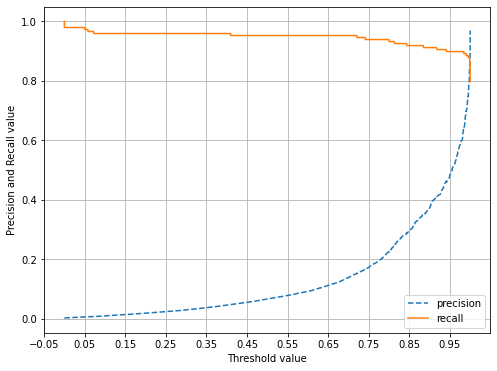

In [38]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축:threshold값, y축:정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, Y축 label과 legend, 그리고 gird 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

임계값이 0.99이하에서는 정밀도가 매우 낮다가 0.99이상에서는 급격하게 상승하고, 재현율이 급격하게 감소하는 것을 볼 수 있다. <br>
이 상태로라면 임계값을 조정하더라도 민감도가 너무 심해 올바른 재현율/정밀도를 얻을 수 없으므로 로지스틱 회귀에서는 SMOTE 적용 후 올바른 예측 모델이 생성될 수가 없다고 결론을 내릴 수 있다.

## -LightGBM

In [37]:
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

오차행렬
[[81118    37]
 [   15   133]]
정확도 : 0.9994, 정밀도 : 0.7824, 재현율 : 0.8986, F1스코어 : 0.8365, AUC : 0.9877


적당히 괜찮은 결과가 나왔다. LightGBM에서는 SMOTE 적용 후 올바르게 예측됨을 확인할 수 있다.

# REMARKS) SMOTE 적용 후에는 재현율은 높아지나, 정밀도가 떨어지는 것이 일반적이다. 좋은 SMOTE 패키지일수록 재현율 증가율은 높이고, 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식한다.